In [1]:
from main import load_data,singleFit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed

/home/dzeiberg/mave_calibration/main.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from generate_aggregate_figs import fit_fig

In [40]:
X,S,sample_names = load_data(data_filepath='/data/dzeiberg/mave_calibration/data/Kato_TP53_AIP1nWT/samples.csv')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[S[:,1] == 1][...,None])

StandardScaler()

In [42]:
XScaled = scaler.transform(X[...,None]).ravel()

In [46]:
fit = {}
best_likelihood = -np.inf
fit_results = Parallel(n_jobs=32,verbose=25)(delayed(singleFit)(XScaled, S,
                                                                skewnorm_init_method=None,
                                                                max_iters=10000,
                                                                init_to_sample=None,
                                                                verbose=False,
                                                                buffer_stds=0) for i in range(100))
for component_params, weights, likelihoods in fit_results:
    if likelihoods[-1] > best_likelihood:
        fit = dict(zip(('component_params','weights','likelihoods','sample_names'),(component_params, weights, likelihoods,sample_names)))
        best_likelihood = likelihoods[-1]

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=32)]: Done   2 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   3 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   5 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   6 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   7 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    6.3s
[Parallel(n_jobs=32)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  11 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  12 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  14 tasks      | elapsed:    6.4s
[Parallel(n_jobs=32)]: Done  15 tasks      | elapsed:  

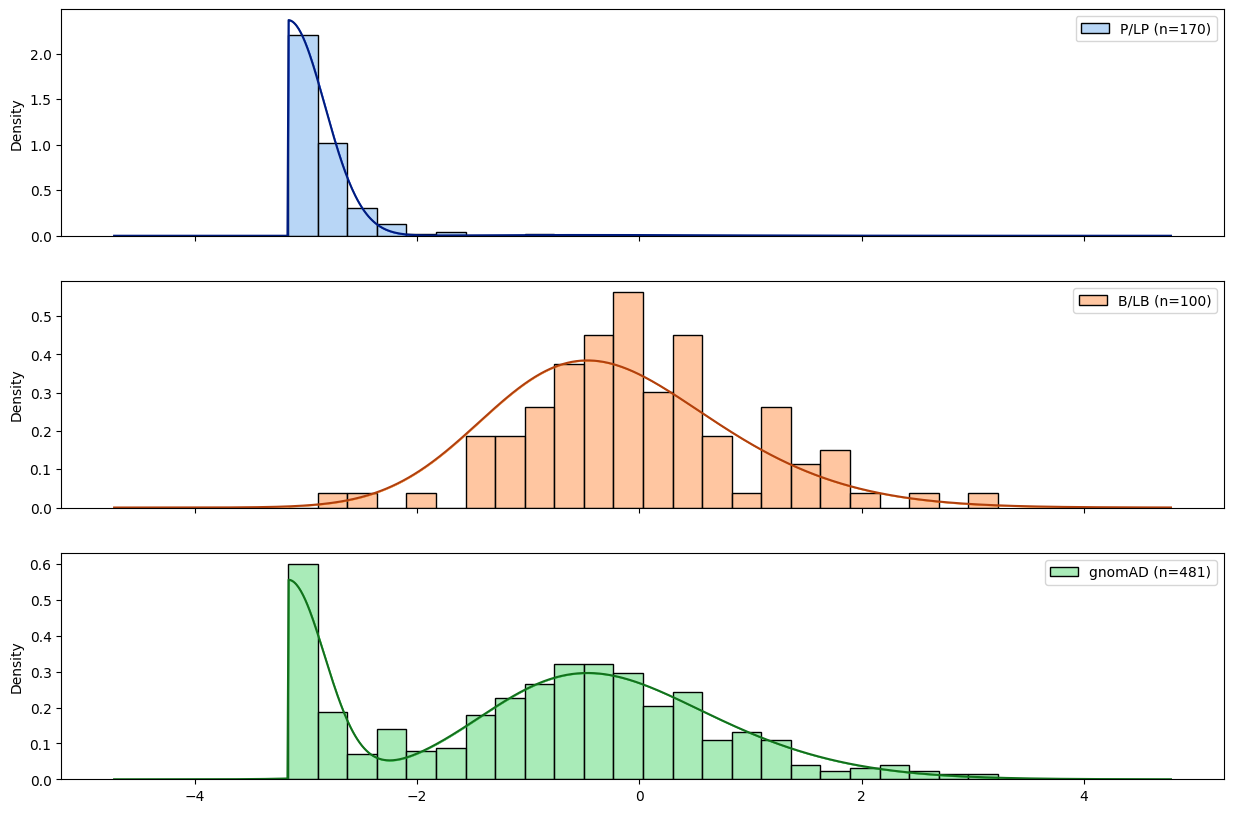

In [47]:
# fig, ax = plt.subplots(S.shape[1],2,figsize=(15,10),sharex=True,sharey=False)
# fit_fig(X,S, sample_names, [fitMLE,],ax[:,0])
# fit_fig(X,S, sample_names, [fitMM,],ax[:,1])
fig, ax = plt.subplots(S.shape[1],1,figsize=(15,10),sharex=True,sharey=False)
fit_fig(XScaled,S, sample_names, [fit,],ax)